In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Aca implementare EDP elipticas 

<img src="eliptica1.png">

<img src="eliptica2.png">

<img src="eliptica3.png">

In [2]:
# este es para eliptica pero con condiciones de contorno de dirichlet
# queda pendiente para las condiciones de newman
def elipticasEDP(ax0=0,ay0=0,nx=10,my=10,h=1,itmax=100,g=None,f=None,limcondi=None):
    '''
    Se resuelve la EDP :  laplaciano(u)  + f * u = g 
    Para eso llenamos la matriz u[i,j]  , para luego procedemos a refinarla usando metodo de gauss-seidel 
    Esta funcion recibe como parametros lo siguiente : 
    - ax0 , ay0 = son el borde superior izquierdo de la matriz . Seria como el u[0,0]
    - nx = seria el punto n-esimo de la division horizontal de la malla 
    - my = seria el punto m-esimo de la division vertical de la malla
    - h = seria el valor de paso , tanto para el eje "x" y "y" 
    - itmax = es el numero de iteracion para el metodo de gauss seidel
    - g,f = funciones de dos variable correspondientes al problema 
    - limcondi = son las condiciones de contorno que se conoce
    Lo que devuelve esta funcion la matriz "u" que resuelve el problema
    '''
    # reservamos espacio para una matriz de (my+1)*(nx+1)
    u = np.ndarray( shape=(my+1,nx+1), dtype = np.float64 )  
    ## llenamos los limites de los contornos . 
    for j in range(0,my+1):
        y = ay0 + j*h
        u[0,j] = limcondi(ax0,y) # parte izquierda 
        u[nx,j] = limcondi(ax0 + nx*h,y) # parte derecha 
    for i in range(0,nx+1):
        x = ax0 + i*h
        u[i,0] = limcondi(x,ay0) # parte inferior
        u[i,my] = limcondi(x,ay0 + my*h) # parte superior 
        
    for j in range(1,my):
        y = ay0 + j*h
        for i in range(1,nx):
            x = ax0 + i*h
            u[i,j] = 1 # con esta condicion iniciamos , luego refinamos    
    # refinamos la malla con gauss seidel  
    for k in range(0,itmax):
        for j in range(1,my):
            y = ay0 + j*h
            for i in range(1,nx):
                x = ax0 + i*h
                # aplicando metodo de gauss seidel 
                v = u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1]
                # g(x,y) no se pasa como argumentos ya que estan definidas como variable global 
                u[i,j] = (v-h**2*g(x,y)) / (4-h**2*f(x,y))
    
    return u
        

In [3]:
# implementemos un ejemplo para comprobar si nuestra funcion , funciona 
'''
El problema a resolver es laplaciano(u) + (-1/25)*u = 0 en un cuadrado unidad
donde las condiciones de contorno es u = q 
q = cosh(1/5x) + cosh(1/5*y)

Entonces tenemos 
f = -1/25
g = 0 
ax0 = ay0 = 0
h = 1/8 
nx =  8
my = 8 
itmax = 75
limcondi= cosh(1/5x) + cosh(1/5*y)
'''
def contorno(x,y):
    return np.float64( np.cosh(1/5*x) + np.cosh(1/5*y) )
    
    
def fprob(x,y):
    return np.float64(-1/25)

def gprob(x,y):
    return 0

matriz = elipticasEDP(ax0=0,ay0=0,nx=8,my=8,h=1/8,itmax=75,f=fprob,g=gprob,limcondi=contorno)
matriz # la matriz aparecera de la foorma que tu no la quieres , aparecera invertida 

array([[2.        , 2.00031252, 2.00125026, 2.00281382, 2.00500417,
        2.00782268, 2.01127111, 2.01535162, 2.02006676],
       [2.00031252, 2.00062234, 2.00155817, 2.00312077, 2.00531112,
        2.00813046, 2.0115803 , 2.01566249, 2.02037927],
       [2.00125026, 2.00155817, 2.00249264, 2.00405457, 2.00624493,
        2.00906485, 2.01251568, 2.01659906, 2.02131702],
       [2.00281382, 2.00312077, 2.00405457, 2.00561616, 2.00780652,
        2.01062674, 2.01407806, 2.01816203, 2.02288057],
       [2.00500417, 2.00531112, 2.00624493, 2.00780652, 2.00999689,
        2.01281711, 2.01626843, 2.02035239, 2.02507092],
       [2.00782268, 2.00813046, 2.00906485, 2.01062674, 2.01281711,
        2.01563707, 2.01908796, 2.02317141, 2.02788943],
       [2.01127111, 2.0115803 , 2.01251568, 2.01407806, 2.01626843,
        2.01908796, 2.02253813, 2.02662071, 2.03133787],
       [2.01535162, 2.01566249, 2.01659906, 2.01816203, 2.02035239,
        2.02317141, 2.02662071, 2.03070224, 2.03541837],


# Resolvemos el siguiente problema
<img src="eliptica4.png">

# Resolvemos el problema pero pensando que aislado es T=0 

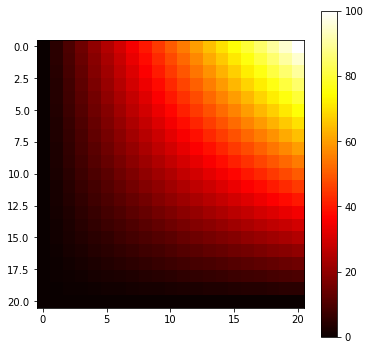

In [4]:
'''
El problema a resolver es laplaciano(u) = 0 en un cuadrado unidad
donde las condiciones de contorno son las indicadas en la imagen

Entonces tenemos 
f = 0
g = 0 
ax0 = ay0 = 0
h = 0.25
nx =  4
my = 4
itmax = 75
'''
def contorno(x,y):
    if x==0 or y==0:
        resultado = 0
    else:
        if x==1:
            resultado = 100*y
        elif y == 1:
            resultado = 100*x
        else:
            resultado = 0             
    return resultado
         
def fprob(x,y):
    return 0

def gprob(x,y):
    return 0

matriz = elipticasEDP(ax0=0,ay0=0,nx=20,my=20,h=1/20,itmax=300,f=fprob,g=gprob,limcondi=contorno)
matriz # te aparecera de una forma diferente al que ves 
# invertimos 
matriz = matriz.T[::-1]# mapa de clalor
plt.figure(figsize=(6,6))
plt.imshow(matriz, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

# Ahora si resolvemos el problema con las condiciones de newman

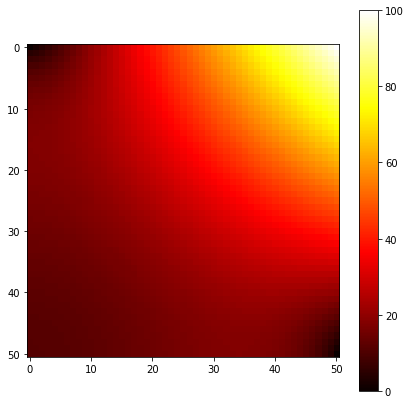

In [26]:
# este es para eliptica pero con condiciones de contorno de dirichlet derecha y arriba , newman -> abajo ,izquierda
# Esta funcion es elipticas con una ligera modificacion
def elipticasEDP_mod(ax0=0,ay0=0,nx=10,my=10,h=1,itmax=100,g=None,f=None,limcondi=None):
    '''
    Se resuelve la EDP :  laplaciano(u)  + f * u = g 
    Para eso llenamos la matriz u[i,j]  , para luego procedemos a refinarla usando metodo de gauss-seidel 
    Esta funcion recibe como parametros lo siguiente : 
    - ax0 , ay0 = son el borde superior izquierdo de la matriz . Seria como el u[0,0]
    - nx = seria el punto n-esimo de la division horizontal de la malla 
    - my = seria el punto m-esimo de la division vertical de la malla
    - h = seria el valor de paso , tanto para el eje "x" y "y" 
    - itmax = es el numero de iteracion para el metodo de gauss seidel
    - g,f = funciones de dos variable correspondientes al problema 
    - limcondi = son las condiciones de contorno que se conoce
    Lo que devuelve esta funcion la matriz "u" que resuelve el problema
    '''
    # reservamos espacio para una matriz de (my+1)*(nx+1)
    u = np.ndarray( shape=(my+1,nx+1), dtype = np.float64 )  
    ## llenamos los limites de los contornos . 
    for j in range(0,my+1):
        y = ay0 + j*h
        u[0,j] = 1 # parte izquierda /// esta parte sera reemplazada con condiciones de newman
        u[nx,j] = limcondi(ax0 + nx*h,y) # parte derecha 
    for i in range(0,nx):
        x = ax0 + i*h
        u[i,0] = 1 # parte inferior /// esta parte sera reemplazad con condiciones de newman
        u[i,my] = limcondi(x,ay0 + my*h) # parte superior 
        
    for j in range(1,my):
        y = ay0 + j*h
        for i in range(1,nx):
            x = ax0 + i*h
            u[i,j] = 1 # con esta condicion iniciamos , luego refinamos  
    
    # refinamos la malla con gauss seidel  
    for k in range(0,itmax):
        for j in range(0,my):
            y = ay0 + j*h
            for i in range(0,nx):
                x = ax0 + i*h
                if i == 0 or j==0 :
                    if i == 0 and j==0:
                        v = u[i+1,j] + u[i+1,j] + u[i,j+1] + u[i,j+1]
                    elif i == 0 and j != 0:
                        v = u[i+1,j] + u[i+1,j] + u[i,j+1] + u[i,j-1]
                    elif i != 0 and j == 0:
                        v = u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j+1]
                        
                else:
                    # aplicando metodo de gauss seidel 
                    v = u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1]
                # g(x,y) no se pasa como argumentos ya que estan definidas como variable global 
                u[i,j] = (v-h**2*g(x,y)) / (4-h**2*f(x,y))
    return u


# resolvemos el problema
'''
El problema a resolver es laplaciano(u) = 0 en un cuadrado unidad
donde las condiciones de contorno son las indicadas en la imagen

Entonces tenemos 
f = 0
g = 0 
ax0 = ay0 = 0
h = 0.25
nx =  4
my = 4
itmax = 75
'''
def contorno(x,y):
    if x==0 or y==0:
        resultado = 0
    else:
        if x==1:
            resultado = 100*y
        elif y == 1:
            resultado = 100*x
        else:
            resultado = 0             
    return resultado
         
def fprob(x,y):
    return 0

def gprob(x,y):
    return 0
# estudia mas !!!!
matriz = elipticasEDP_mod(ax0=0,ay0=0,nx=50,my=50,h=1/50,itmax=900,f=fprob,g=gprob,limcondi=contorno)
matriz # te aparecera de una forma diferente al que ves 
# invertimos 
matriz = matriz.T[::-1]# mapa de clalor
plt.figure(figsize=(7,7))
plt.imshow(matriz, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
        

# Problema 2 de la PC

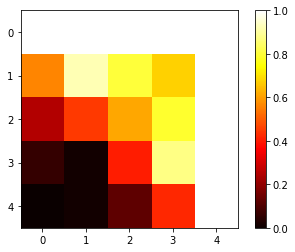

In [6]:
# haremos del problema de la PC 
'''
El problema a resolver es laplaciano(u) = -\rho/epsilon en un cuadrado unidad
donde las condiciones de contorno son las indicadas en la imagen

Entonces tenemos 
f = 0
g =  177,08 × 10−12Cos(3πx)Sin(2πy)
ax0 = ay0 = 0
h = 0.25
nx =  4
my = 4
itmax = 75
'''
lamda1 = 1
lamda2 = 1
def contorno(x,y):
    if x==0 :
        resultado = lamda1*y**2
    elif x==1:
        resultado = 1
    elif y==0:
        resultado = lamda2*x**3
    elif y==1:
        resultado = 1
    return resultado

         
def fprob(x,y):
    return 0

def gprob(x,y):
    epsilon = 8.854
    return np.float64(-177.08/epsilon*np.cos(3*np.pi*x)*np.sin(2*np.pi*y))

matriz = elipticasEDP(ax0=0,ay0=0,nx=4,my=4,h=1/4,itmax=100,f=fprob,g=gprob,limcondi=contorno)
matriz # te aparecera de una forma diferente al que ves 
matriz = matriz.T[::-1]# mapa de clalor
matriz
plt.imshow(matriz, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

# Aca implementare EDP parabolicas

In [7]:
# demostrare que puedo simular lo siguiente para hacer la simulacion de calor

### FTCS scheme [aqui](https://en.wikipedia.org/wiki/FTCS_scheme)
<img src="parabolica1.png">
<img src="parabolica3.png">

In [8]:
# funcion para el FTCS metodo 
def parabolicFTCS(k=0,h=0,f=None,x1=0,gx1=0,x2=1,gx2=0,t0=0,gt0=0,tfinal=100):
    '''
    Esta funcion resuelve problemas de una dimension de la forma diff2x_u + f(x)*diff1x_u = difft_u
    Para eso te pide los siguientes argumentos 
    - k = cantidad paso temporal 
    - h = cantidad de paso espacial
    - f = funcion de una variable "x" en la ecuacion diferencial
    - x1 = extremo izquierdo espacial
    - gx1 = condicion de extremo izquierdo u(x=x1,t) = gx1
    - x2 = extremo derecho espacial
    - gx2 = condicion de extremo derecho  u(x=x2,t) = gx2
    - t0 = tiempo inicial de la simulacion
    - gt0 = es la condicion inicial , es decir u(x,t=t0) = gt0
    - tfinal = hasta que tiempo final se esta haciendo la simulacion 
    
    Esta funcion retorna un array donde cada columna representa el estado u(x,t=tiempo) en un tiempo especifico
    Es decir las filas son como a "x" como columna es a "tiempo"
    
    '''
    # calculamos cuantas iteraciones vamos a hacer para llegar al tiempo final
    pasos_temporal = int((tfinal-t0)/k)
    # calculamos el segemnto entre x1 y x2 en cuanto sera dividio
    pasos_espacial = int((x2-x1)/h)
    
    ########## creamos la matriz donde haremos todos los calculos 
    # el +1 hace la cuenta de la condicion inicial (OJO)
    u = np.zeros( shape=(pasos_espacial+1,pasos_temporal+1), dtype = np.float64 ) 
    
    ####### LLenamos las condiciones de contorno
    s1 = k/h**2
    s2 = k/h
    # llenamos la condicion inicial temporal y espacial
    for i in range(1,pasos_espacial):
        x = x1 + i*h
        u[i,0] = gt0(x)

    for j in range(0,pasos_temporal+1):
        t = t0 + j*k
        u[0,j] = gx1(t)
        u[pasos_espacial,j] = gx2(t)
    
    ###### LLenamos todos los tiempos 
    for j in range(0,pasos_temporal):
        t = t0 + j*k
        for i in range(1,pasos_espacial):
            x = x1 + i*h
            u[i,j+1] = (s1+s2/2*f(x))*u[i+1,j] + (1-2*s1)*u[i,j] + (s1-s2/2*f(x))*u[i-1,j]
    return u
        

<img src="parabolica2.png">
$$\huge{ e^{\left(-\pi^2\cdot t\right)} sin(\pi\cdot x) }$$

In [9]:
# probemos nuestra funcion
# solucion analitica  u = np.e**(-np.pi**2*t) * np.sin(np.pi*x)
def fprob(x):
    return 0
def gx1prob(t):
    return 0
def gx2prob(t):
    return 0

def gt0prob(x):
    return np.float64(np.sin(np.pi*x))


matriz = parabolicFTCS(k=0.005,h=0.1,f=fprob,x1=0,gx1=gx1prob,x2=1,gx2=gx2prob,
                      t0=0,gt0=gt0prob,tfinal=0.01)
matriz

array([[0.        , 0.        , 0.        ],
       [0.30901699, 0.29389263, 0.2795085 ],
       [0.58778525, 0.55901699, 0.53165676],
       [0.80901699, 0.76942088, 0.73176275],
       [0.95105652, 0.9045085 , 0.8602387 ],
       [1.        , 0.95105652, 0.9045085 ],
       [0.95105652, 0.9045085 , 0.8602387 ],
       [0.80901699, 0.76942088, 0.73176275],
       [0.58778525, 0.55901699, 0.53165676],
       [0.30901699, 0.29389263, 0.2795085 ],
       [0.        , 0.        , 0.        ]])

In [10]:
def analitico(x,t):
    return np.float64(np.e**(-np.pi**2*t) * np.sin(np.pi*x))
t0 = 0
x1 = 0
k = 0.005
h = 0.1
matrizprueba = np.ndarray( shape=(11,3), dtype = np.float64 ) 
for j in range(0,3):
    t = t0 + j*k
    for i in range(0,11):
        x = x1 + i*h
        matrizprueba[i,j] = analitico(x,t).round(6)
matrizprueba

array([[0.      , 0.      , 0.      ],
       [0.309017, 0.294138, 0.279975],
       [0.587785, 0.559483, 0.532544],
       [0.809017, 0.770063, 0.732984],
       [0.951057, 0.905263, 0.861674],
       [1.      , 0.95185 , 0.906018],
       [0.951057, 0.905263, 0.861674],
       [0.809017, 0.770063, 0.732984],
       [0.587785, 0.559483, 0.532544],
       [0.309017, 0.294138, 0.279975],
       [0.      , 0.      , 0.      ]])

# crank-nicholson scheme

# full implicit scheme

# Dufort-Frankel scheme 

<img src="diferenciar_derecha_izquierda.png">
<img src="diferenciar_centro.png">

# simulacion que verifique visualmente mi resultado

# Tenemos que resolver el siguiente problema 
<img src="parabolica4.png">

In [27]:
%matplotlib inline
from ipywidgets import interactive
import seaborn as sb
# funcion para el FTCS metodo 
# para resolver el problema se hizo un ligero cambio 
# para hallar la condicion de extrema derecha que usare 
def parabolicFTCS_mod(k=0,h=0,f=None,x1=0,gx1=0,x2=1,gx2=0,t0=0,gt0=0,tfinal=100):
    '''
    Esta funcion resuelve problemas de una dimension de la forma diff2x_u + f(x)*diff1x_u = difft_u
    Para eso te pide los siguientes argumentos 
    - k = cantidad paso temporal 
    - h = cantidad de paso espacial
    - f = funcion de una variable "x" en la ecuacion diferencial
    - x1 = extremo izquierdo espacial
    - gx1 = condicion de extremo izquierdo diff1t_u(x=x1,t) = gx1
    - x2 = extremo derecho espacial
    - gx2 = condicion de extremo derecho  u(x=x2,t) = gx2
    - t0 = tiempo inicial de la simulacion
    - gt0 = es la condicion inicial , es decir u(x,t=t0) = gt0
    . tfinal = hasta que tiempo final se esta haciendo la simulacion 
    
    //// es bueno aclarar que h , k ,x1 ,x2 ,t0, tfinal deben ser coherente , es decir para que no ocurra cosas raras
    //// en hacer los pasos temporales y pasos espaciales 
    
    Esta funcion retorna un array donde cada columna representa el estado u(x,t=tiempo) en un tiempo especifico
    Es decir las filas son como a "x" como columna es a "tiempo"
    
    '''
    # calculamos cuantas iteraciones vamos a hacer para llegar al tiempo final
    pasos_temporal = int((tfinal-t0)/k)
    # calculamos el segemnto entre x1 y x2 en cuanto sera dividio
    pasos_espacial = int((x2-x1)/h)
    
    ########## creamos la matriz donde haremos todos los calculos 
    # el +1 hace la cuenta de la condicion inicial (OJO)
    u = np.zeros( shape=(pasos_espacial+1,pasos_temporal+1), dtype = np.float64 ) 
    
    ####### LLenamos las condiciones de contorno
    s1 = k/h**2
    s2 = k/h
    u[0,0] = gx1(t0)
    # llenamos la condicion inicial temporal y espacial
    for i in range(1,pasos_espacial):
        x = x1 + i*h
        u[i,0] = gt0(x)
    for j in range(0,pasos_temporal+1):
        t = t0 + j*k
        # la modificacion se hizo aca --------- u[0,j] = gx1(t)
        u[pasos_espacial,j] = gx2(t)
    
    ###### LLenamos todos los tiempos 
    for j in range(0,pasos_temporal):
        t = t0 + j*k
        for i in range(1,pasos_espacial):
            x = x1 + i*h
            u[i,j+1] = (s1+s2/2*f(x))*u[i+1,j] + (1-2*s1)*u[i,j] + (s1-s2/2*f(x))*u[i-1,j]
        # se agrego lo siguiente , aca se uso un forward de segundo orden 
        u[0,j] = (2*k*gx1(t) + u[2,j] -4*u[1,j])/3 
    return u
        

# probemos nuestra funcion
# solucion analitica  u = np.e**(-np.pi**2*t) * np.sin(np.pi*x)
def fprob(x):
    return 1/x
def gx1prob(t):
    return 0
def gx2prob(t):
    return 1

def gt0prob(x):
    return 0

kprob = 0.005
hprob = 0.1
pasos_tempo = 200
pasos_espaciales_para_el_mapa_de_calor = 100
matriz = parabolicFTCS_mod(k=kprob,h=hprob,f=fprob,x1=0,gx1=gx1prob,x2=1,gx2=gx2prob,
                      t0=0,gt0=gt0prob,tfinal=kprob*pasos_tempo).T
# procedemos a graficar . 
matriz[100],matriz.shape , kprob/hprob**2

(array([-0.40360288,  0.45460783,  0.60762266,  0.69943157,  0.76760713,
         0.82063257,  0.86646616,  0.90524843,  0.94050534,  0.97161439,
         1.        ]),
 (201, 11),
 0.4999999999999999)

In [ ]:
x = np.linspace(-1,1,pasos_espaciales_para_el_mapa_de_calor)
y = np.linspace(-1,1,pasos_espaciales_para_el_mapa_de_calor)

x,y = np.meshgrid(x,y)

def f(i,x,y,matrix):
    radio = np.sqrt(x**2+ y**2)
    numeros = np.round(radio/hprob)
    for k in range(len(numeros)):
        for j in range(len(numeros[k])):
            posicion = int(numeros[k,j])
            if posicion >= 1/hprob:
                radio[k,j] = matrix[i,int(1/hprob)]
            else:
                radio[k,j] = matrix[i,int(posicion)]
                
            
    return radio

def plotting(i=0):
    z = f(i,x,y,matriz)
    plt.figure(figsize=(9, 7))
    # recuerda que estas limitando el vmax , podrias cambiarlo 
    ax = sb.heatmap(z,xticklabels= 10 ,yticklabels= 10,cmap="gist_heat",vmin=0,vmax=1)
    plt.title(f"Mapa de calor {i*kprob} s")
    ax.invert_yaxis()
    

interactive_plot = interactive(plotting,i=(0,pasos_tempo,1))
interactive_plot